# Model Selection & Evaluation

1. What is model selection?
2. Consideration for model selection?
3. Model selection techniques  
___
  
  **__what is model selection?__**  
  Model selection is the task of selecting a statistical model from a set of candidate models, given data.  
  
  In the simplest cases, a pre-existing set of data is considered. However, the task can also involve the design of experiments such that the data collected is well-suited to the problem of model selection. 
  
  Model selection is a process that can be applied both: 
  1. **across different types of models (e.g. logistic regression, SVM, KNN, etc.)** 
  2. and **across models of the same type configured with different model hyperparameters (e.g. different kernels in an SVM)**.  
    
___
  > When we have a variety of models of different complexity (e.g., linear or logistic regression models with different degree polynomials, or KNN classifiers with different values of K), how should we pick the right one? .  
  [page 22 - Machine Learning - Probabilistic Prespective](https://www.amazon.com/Machine-Learning-Probabilistic-Perspective-Computation/dp/0262018020/ref=as_li_ss_tl?keywords=Machine+Learning+-+A+Probabilistic+Perspective&qid=1568233495&s=gateway&sr=8-1&linkCode=sl1&tag=inspiredalgor-20&linkId=36f0b3ee1e8fd4b4a723f96894af54a5&language=en_US)  
  
  **Consideration for model selection**. 
  1. The accuracy of the model.  
  2. The interpretability of the model.  
  3. The complexity of the model.  
  4. The scalability of the model.  
  5. How long does it take to build, train, and test the model?  
  6. How long does it take to make predictions using the model?  
  7.Does the model meet the business goal?  
  
  
  Some algorithms require specialized data preparation in order to best expose the structure of the problem to the learning algorithm. Therefore, we must go one step further and consider model selection as the process of selecting among model development pipelines.

Each pipeline may take in the same raw training dataset and outputs a model that can be evaluated in the same manner but may require different or overlapping computational steps, such as:

Data filtering.
Data transformation.
Feature selection.
Feature engineering.
And more…  


  **Model Selection Techniques**. 
  1. Probabilistic Measures: Choose a model via **in-sample error and complexity**.
  2. Resampling Methods: Choose a model via **estimated out-of-sample error**.


## Resampling Method: Train, Valid, Test

Describe more  

1. Splitting Data: Train, Valid, Test  
    a. Random sample  
    b. Stratified sample.  
2. Cross-Validation.  
    a. K-fold.  
    b. Stratified K-fold.  
    c. LOOCV - Leave One Out Cross Validated

# Load Dataset

1. Load Data
2. Check your data: data types, missing data
3. Check simple statistic from your data
4. Let's think what tools that we will try. Data Preprocessing Pla, Model Plan

In [ ]:
import numpy as np
import pandas as pd  # import pandas for data manipulation
pd.options.display.max_columns = None  # set options max_columns to None to display all columns

data = pd.read_csv('/content/credit_risk_dataset.csv')

In [ ]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
data.shape

(32581, 12)

In [ ]:
data.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [ ]:
y = data['loan_status'].copy()
X = data.drop(columns='loan_status').copy()

In [ ]:
num_columns = X.select_dtypes(include='number').columns.tolist()
cat_columns = X.select_dtypes(include='object').columns.tolist()

print("Total numerical columns :", len(num_columns))
print("Total categorical columns :", len(cat_columns))

Total numerical columns : 7
Total categorical columns : 4


In [ ]:
num_idx = [X.columns.get_loc(c) for c in num_columns]
cat_idx = [X.columns.get_loc(c) for c in cat_columns]

In [ ]:
X.columns[num_idx]

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')

In [ ]:
X.columns[cat_idx]

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [ ]:
for col in cat_columns + ['person_age']:
    print(f"{col:<20}: {data[col].unique().tolist()}")

person_home_ownership: ['RENT', 'OWN', 'MORTGAGE', 'OTHER']
loan_intent         : ['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT', 'DEBTCONSOLIDATION']
loan_grade          : ['D', 'B', 'C', 'A', 'E', 'F', 'G']
cb_person_default_on_file: ['Y', 'N']
person_age          : [22, 21, 25, 23, 24, 26, 144, 123, 20, 32, 34, 29, 33, 28, 35, 31, 27, 30, 36, 40, 50, 45, 37, 39, 44, 43, 41, 46, 38, 47, 42, 48, 49, 58, 65, 51, 53, 66, 61, 54, 57, 59, 62, 60, 55, 52, 64, 70, 78, 69, 56, 73, 63, 94, 80, 84, 76, 67]


### Simple Statistics

In [ ]:
X.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [ ]:
X.describe(include='object').T

,count,unique,top,freq
person_home_ownership,32581,4,RENT,16446
loan_intent,32581,6,EDUCATION,6453
loan_grade,32581,7,A,10777
cb_person_default_on_file,32581,2,N,26836


In [ ]:
y.value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

### Check missing value

In [ ]:
X.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
y

0        1
1        0
2        1
3        1
4        1
        ..
32576    0
32577    0
32578    1
32579    0
32580    0
Name: loan_status, Length: 32581, dtype: int64

## Cek Duplicate


In [ ]:
# sanity check  -> kalo disini ngecek duplicate aja
data[data.duplicated()]
# gak ada yg duplicate

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [ ]:
data = data[~data.duplicated(keep='first')]

In [ ]:
data[data.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


## Correlated Features

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_correlation(data):
    corr = data.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))

    fig = plt.figure(figsize=(10, 10))

    ax = sns.heatmap(
        corr, 
        mask=mask,
        vmin=-1, vmax=1, center=0,
        cmap='coolwarm',
        square=True,
        linewidths=0.3,
        annot=True,
        fmt=".2f",
        annot_kws={"size": 8},
        cbar_kws={"shrink": .5}
    )

    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )

    ax.set_title("Correlation", size=14)

    plt.show()

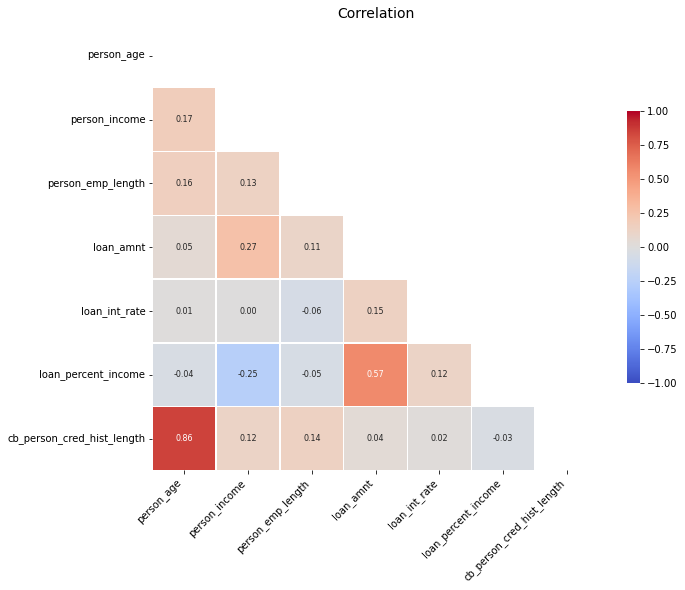

In [ ]:
plot_correlation(X[num_columns])

## Data Splitting

### Model Validation  

![alt text](Capture2.PNG)

___  

1. Training Dataset: The sample of data used to fit the model  
2. Validation Dataset: The sample of data used to provide an unbiased evaluation of a model fit on the training  dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration  
3. Test Dataset: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.  

Some models need substantial data to train upon, so you would optimize for the more extensive training sets in this case.  
* Models with very few hyper-parameters will be easy to validate and tune, so you can probably reduce the size of your validation set.  
* But if your model has many hyper-parameters, you would want to have a significant validation set as well.
* If you happen to have a model with no hyper-parameters or ones that cannot be easily tuned, you probably don’t need a validation set too.

**Random Sampling**  

Most typical splitting is random sampling. We split the dataset randomly for **unbiased evaluation**.  
</br></br>First we split our data to train and test (holdout sample).  
Typical splitting proportion in train and test.

train 60 valid20 test 20

In [ ]:
# from sklearn.model_selection import train_test_split


# SEED = 42 # random number

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)


# print("Number of Train :", len(y_train), f"{round(len(y_train) / len(y) * 100, 2)}%")
# print("Number of Test :", len(y_test), f"{round(len(y_test) / len(y) * 100, 2)}%")

In [ ]:
# print("Percentage of target in Train :", np.mean(y_train))
# print("Percentage of target in Test :", np.mean(y_test))

<b>Parameter in train_test_split:</b>

test_size : float, int or None, optional (default=0.25)
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. By default, the value is set to 0.25.
    The default will change in version 0.21. It will remain 0.25 only
    if ``train_size`` is unspecified, otherwise it will complement
    the specified ``train_size``.

train_size : float, int, or None, (default=None)
    If float, should be between 0.0 and 1.0 and represent the
    proportion of the dataset to include in the train split. If
    int, represents the absolute number of train samples. If None,
    the value is automatically set to the complement of the test size.

random_state : int, RandomState instance or None, optional (default=None)
    If int, random_state is the seed used by the random number generator;
    If RandomState instance, random_state is the random number generator;
    If None, the random number generator is the RandomState instance used
    by `np.random`.

shuffle : boolean, optional (default=True)
    Whether or not to shuffle the data before splitting. If shuffle=False
    then stratify must be None.

stratify : array-like or None (default=None)
    If not None, data is split in a stratified fashion, using this as
    the class labels.

**Stratified Sampling**

<img src='stratified-sampling.jpeg'>

In [ ]:
from sklearn.model_selection import train_test_split

SEED=40

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=SEED)

print("Number of Train :", len(y_train), f"{round(len(y_train) / len(y) * 100, 2)}%")
print("Number of Test :", len(y_test), f"{round(len(y_test) / len(y) * 100, 2)}%")

Number of Train : 22806 70.0%
Number of Test : 9775 30.0%


In [ ]:
print("Percentage of target in Train :", np.mean(y_train))
print("Percentage of target in Test :", np.mean(y_test))

Percentage of target in Train : 0.21814434797860213
Percentage of target in Test : 0.2182097186700767


In [ ]:
# X_train

In [ ]:
# X_train.to_csv('X_train.csv')
# y_train.to_csv('y_train.csv')
# X_test.to_csv('X_test.csv')
# y_test.to_csv('y_test.csv')

### Data Preprocess

distinguish numerical and categorical variable since it will have a different approach of preprocessing

In [ ]:
def get_data_by_types(X_train, X_test):
    X_train_num, X_train_cat = X_train[num_columns], X_train[cat_columns]
    X_test_num, X_test_cat = X_test[num_columns], X_test[cat_columns]
    return X_train_num, X_train_cat, X_test_num, X_test_cat

In [ ]:
X_train_num, X_train_cat, X_test_num, X_test_cat = get_data_by_types(X_train, X_test)

#### categorical variable

In [ ]:
# List Columns with NaN
print('Total columns:',data.shape[1])
print('Total columns with nan:',len(data.columns[data.isna().any()]))

Total columns: 12
Total columns with nan: 2


In [ ]:
# data['person_emp_length'].value_counts()

In [ ]:
# data['loan_int_rate'].value_counts()

In [ ]:
# # Nan Percentage by Column
# list_column_nan_data = data[data.columns[data.isnull().any()]].isnull().sum() * 100 / data.shape[0]
# list_column_nan_data


In [ ]:
# list_drop_na = list_column_nan_data[list_column_nan_data>=75].index.tolist()
# data = data.drop(list_drop_na, axis=1)

In [ ]:
# continuous_features = ['person_emp_length', 'loan_int_rate']
# continuous_features

In [ ]:
# list_fill_na = list_column_nan_data[list_column_nan_data<75].index.tolist()

In [ ]:
# list_fill_na_continuous = list(set(continuous_features).intersection(set(list_fill_na)))
# list_fill_na_continuous

In [ ]:
# for i in list_fill_na_continuous:
#     data[f'{i}_nan'] = data[i].fillna(data[i].median())
    
#     # kita mau buat 2 skenario, mau isi mediannya 

In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy="constant", fill_value="missing")
imp.fit(X_train_cat)

SimpleImputer(add_indicator=False, copy=True, fill_value='missing',
              missing_values=nan, strategy='constant', verbose=0)

In [ ]:
X_train_cat = imp.transform(X_train_cat)
X_test_cat = imp.transform(X_test_cat)

Check missing value

In [ ]:
pd.DataFrame(X_train_cat, columns=cat_columns).isnull().sum()

person_home_ownership        0
loan_intent                  0
loan_grade                   0
cb_person_default_on_file    0
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first')
ohe.fit(X_train_cat)

X_train_cat = ohe.transform(X_train_cat).toarray()
X_test_cat = ohe.transform(X_test_cat).toarray()

In [ ]:
X_train_cat = pd.DataFrame(X_train_cat, columns=ohe.get_feature_names(cat_columns), index=X_train.index)
X_test_cat = pd.DataFrame(X_test_cat, columns=ohe.get_feature_names(cat_columns), index=X_test.index)

In [ ]:
# Create a function to preprocess categorical variable
def preprocess_categorical(X_train_cat, X_test_cat):
    imp = SimpleImputer(strategy="constant", fill_value="missing")
    ohe = OneHotEncoder(drop="first")
    
    imp.fit(X_train_cat)
    
    X_train_cat = imp.transform(X_train_cat)
    X_test_cat = imp.transform(X_test_cat)
    
    ohe.fit(X_train_cat)
    
    X_train_cat = ohe.transform(X_train_cat).toarray()
    X_test_cat = ohe.transform(X_test_cat).toarray()
    
    X_train_cat = pd.DataFrame(X_train_cat, columns=ohe.get_feature_names(cat_columns), index=X_train.index)
    X_test_cat = pd.DataFrame(X_test_cat, columns=ohe.get_feature_names(cat_columns), index=X_test.index)

    return X_train_cat, X_test_cat

In [ ]:
X_train_num, X_train_cat, X_test_num, X_test_cat = get_data_by_types(X_train, X_test)
X_train_cat, X_test_cat = preprocess_categorical(X_train_cat, X_test_cat)

In [ ]:

pd.DataFrame(X_train_cat)

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
10913,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21010,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14431,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10024,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
30633,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18908,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17888,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10625,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27258,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Numerical Variable

In [ ]:
pd.DataFrame(X_train_num, columns=num_columns).isnull().sum()

person_age                       0
person_income                    0
person_emp_length              623
loan_amnt                        0
loan_int_rate                 2176
loan_percent_income              0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# sc.fit(X_train.loc[:, num_columns])

In [ ]:
# X_train_num = sc.transform(X_train[num_columns])
# X_test_num = sc.transform(X_test[num_columns])

In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values = np.nan, strategy = 'median') 
imp.fit(X_train_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [ ]:
X_train_num = imp.transform(X_train_num)
X_test_num = imp.transform(X_test_num)

In [ ]:
X_train_num

array([[2.6000e+01, 7.0000e+04, 0.0000e+00, ..., 7.8800e+00, 1.0000e-01,
        4.0000e+00],
       [3.2000e+01, 4.5000e+04, 1.6000e+01, ..., 7.4900e+00, 1.3000e-01,
        6.0000e+00],
       [2.1000e+01, 3.1200e+04, 4.0000e+00, ..., 6.6200e+00, 4.8000e-01,
        3.0000e+00],
       ...,
       [2.4000e+01, 6.3582e+04, 3.0000e+00, ..., 1.3850e+01, 2.2000e-01,
        3.0000e+00],
       [2.9000e+01, 1.3000e+05, 5.0000e+00, ..., 7.4900e+00, 1.9000e-01,
        1.0000e+01],
       [3.0000e+01, 2.7000e+04, 4.0000e+00, ..., 7.8800e+00, 1.6000e-01,
        9.0000e+00]])

In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder(drop='first')
# ohe.fit(X_train_num)

# X_train_num = ohe.transform(X_train_num).toarray()
# X_test_num = ohe.transform(X_test_num).toarray()

In [ ]:
X_train_num = pd.DataFrame(X_train_num, columns=num_columns, index=X_train.index)
X_test_num = pd.DataFrame(X_test_num, columns=num_columns, index=X_test.index)

In [ ]:
# # Create a function to preprocess categorical variable
# def preprocess_numerical(X_train_num, X_test_num):
#     imp = SimpleImputer(missing_values = np.nan, strategy = 'median')

    
#     imp.fit(X_train_num)
    
#     X_train_num = imp.transform(X_train_num)
#     X_test_num = imp.transform(X_test_num)
    
    
#     X_train_num = pd.DataFrame(X_train_num, columns=ohe.get_feature_names(cat_columns), index=X_train.index)
#     X_test_num = pd.DataFrame(X_test_num, columns=ohe.get_feature_names(cat_columns), index=X_test.index)

#     return X_train_num, X_test_num

In [ ]:
# X_train_num, X_train_cat, X_test_num, X_test_cat = get_data_by_types(X_train, X_test)
# X_train_num, X_test_num = preprocess_numerical(X_train_num, X_test_num)

In [ ]:
X_train_trans = X_train_cat.join(X_train_num)
X_test_trans = X_test_cat.join(X_test_num)

In [ ]:
X_train_trans.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
10913,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,70000.0,0.0,7000.0,7.88,0.10,4.0
21010,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,45000.0,16.0,6000.0,7.49,0.13,6.0
14431,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,31200.0,4.0,15000.0,6.62,0.48,3.0
10024,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,65000.0,2.0,10000.0,10.75,0.15,4.0
30633,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,36.0,49000.0,0.0,8000.0,15.31,0.16,13.0


In [ ]:
pd.DataFrame(X_train_trans, columns=num_columns).isnull().sum()

person_age                    0
person_income                 0
person_emp_length             0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_cred_hist_length    0
dtype: int64

In [ ]:
pd.DataFrame(X_test_trans, columns=num_columns).isnull().sum()

person_age                    0
person_income                 0
person_emp_length             0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_cred_hist_length    0
dtype: int64

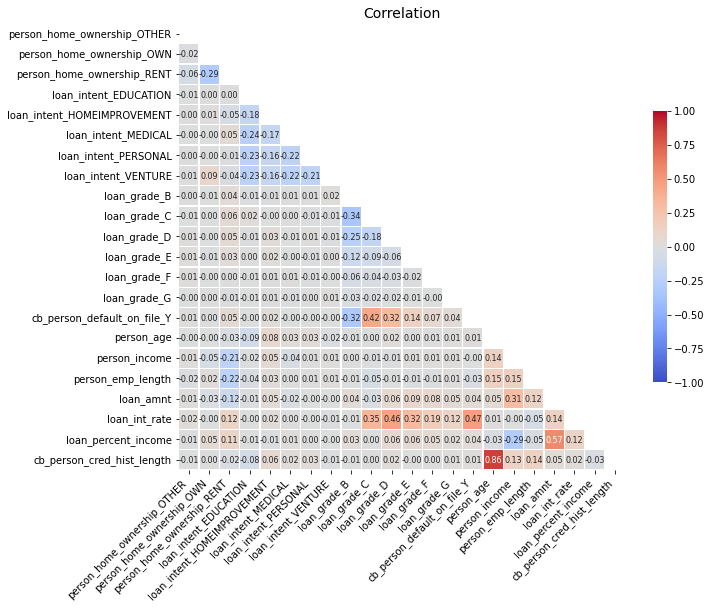

In [ ]:
plot_correlation(X_train_trans)

### Train Model

In [ ]:
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import roc_auc_score

lr = LogisticRegression(random_state=SEED, max_iter=1000)
lr.fit(X_train_trans, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=40, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
yhat_train = lr.predict_proba(X_train_trans)[:, 1]
yhat_test = lr.predict_proba(X_test_trans)[:, 1]

# Base model

In [ ]:
print("ROC-AUC Score Train:", roc_auc_score(y_train, yhat_train))
print("ROC-AUC Score Test:", roc_auc_score(y_test, yhat_test))

ROC-AUC Score Train: 0.7587944433062064
ROC-AUC Score Test: 0.7674799234815666


In [ ]:
# https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python
def get_optimal_cutoff(tpr, fpr, thresholds):
    i = np.arange(len(tpr)) # index for df
    roc = pd.DataFrame({
        'fpr' : pd.Series(fpr, index=i),
        'tpr' : pd.Series(tpr, index = i), 
        '1-fpr' : pd.Series(1-fpr, index = i), 
        'tf' : pd.Series(tpr - (1-fpr), index = i), 
        'thresholds' : pd.Series(thresholds, index = i)})
    
    print(roc.iloc[[(roc.tf-0).abs().argmin()]])

    # Plot tpr vs 1-fpr
    fig, ax = plt.subplots()
    _ = plt.plot(roc['tpr'])
    _ = plt.plot(roc['1-fpr'], color = 'red')
    _ = plt.xlabel('1-False Positive Rate')
    _ = plt.ylabel('True Positive Rate')
    _ = plt.title('Receiver operating characteristic')
    _ = ax.set_xticklabels([])
    
    
def plot_roc_auc(tpr, fpr, labels):
    
    if (isinstance(tpr, (list, np.array)) and isinstance(fpr, (list, np.array))):
        
        nlist = len(tpr)
        
        if all(len(val) == nlist for val in [tpr, fpr, labels]):
            pass
        else:
            raise ValueError('length of parameter should be the same')
               
        fig, ax = plt.subplots(figsize=(8, 6.5))
        _ = sns.despine(ax=ax)
        _ = ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
        _ = ax.set_xlim([0.0, 1.0])
        _ = ax.set_ylim([0.0, 1.05])
        _ = ax.set_xlabel('False Positive Rate')
        _ = ax.set_ylabel('True Positive Rate')
        _ = ax.set_title('Receiver operating characteristic example')
        
        for i in range(nlist):
        
            roc_auc = auc(fpr[i], tpr[i])
            _ = ax.plot(
                fpr[i], 
                tpr[i], 
                label=f'ROC curve {labels[i]} (area = {roc_auc: 0.2f}'
            )
        
        _ = fig.legend(loc="right")
        
    else:
        roc_auc = auc(fpr, tpr)
        
        fig, ax = plt.subplots(figsize=(8, 6.5))
        _ = sns.despine(ax=ax)
        _ = ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
        _ = ax.set_xlim([0.0, 1.0])
        _ = ax.set_ylim([0.0, 1.05])
        _ = ax.set_xlabel('False Positive Rate')
        _ = ax.set_ylabel('True Positive Rate')
        _ = ax.set_title('Receiver operating characteristic example')
        _ = ax.plot(
            fpr, 
            tpr, 
            label=f'ROC curve {labels} (area = {roc_auc: 0.2f}'
        )
        
    _ = fig.legend(loc="right")

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report

fpr_train, tpr_train, thresholds_train =roc_curve(y_train, 
                                                  yhat_train)
fpr_test, tpr_test, thresholds_test =roc_curve(y_test, 
                                               yhat_test)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

print("ROC-AUC TRAIN", roc_auc_train)
print("ROC-AUC TEST", roc_auc_test)

ROC-AUC TRAIN 0.7587944433062064
ROC-AUC TEST 0.7674799234815666


           fpr       tpr     1-fpr        tf  thresholds
1242  0.303847  0.695734  0.696153 -0.000419    0.269973


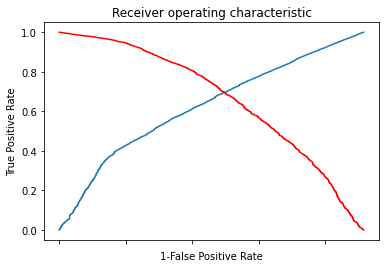

In [ ]:
tpr = tpr_test
fpr = fpr_test

thresholds = thresholds_test
get_optimal_cutoff(tpr, fpr, thresholds)

In [ ]:
threshold = 0.5

y_pred_train = np.where(yhat_train > 0.276966, 1, 0)
y_pred_test = np.where(yhat_test> 0.276966, 1, 0)

print(classification_report(y_test, 
                            y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      7642
           1       0.40      0.69      0.51      2133

    accuracy                           0.71      9775
   macro avg       0.65      0.70      0.65      9775
weighted avg       0.78      0.71      0.73      9775



In [ ]:
# threshold = 0.3312090

# y_pred_train = np.where(yhat_train > threshold, 1, 0)
# y_pred_test = np.where(yhat_test> threshold, 1, 0)

# print(classification_report(y_test, 
#                             y_pred_test))

## Model Validation: Cross Validation

In k-fold cross-validation, we randomly split the training dataset into k folds without replacement, where k — 1 folds are used for the model training, and one fold is used for performance evaluation. This procedure is repeated k times so that we obtain k models and performance estimates.
<img src='Capture3.png'>

In [ ]:
#Running K-fold CV
from sklearn.model_selection import KFold

#Defining Kfold
kfold = KFold(n_splits=4, shuffle=True, random_state=SEED).split(X_train_trans, y_train)

#Defining the model
lr = LogisticRegression(random_state=SEED, C=5, max_iter=1000) # try to change C

#Initialize empty list for the scores
scores = []

#Loop the kfold
for k, (train, test) in enumerate(kfold):
    lr.fit(X_train_trans.iloc[train], y_train.iloc[train])
    
    yhat = lr.predict_proba(X_train_trans.iloc[test])[:, 1]
    score = roc_auc_score(y_train.iloc[test], yhat)
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,np.bincount(y_train.iloc[train]), score))
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [13427  3677], Acc: 0.792
Fold:  2, Class dist.: [13360  3744], Acc: 0.744
Fold:  3, Class dist.: [13340  3765], Acc: 0.769
Fold:  4, Class dist.: [13366  3739], Acc: 0.770
CV accuracy: 0.769 +/- 0.017


In [ ]:
#Running K-fold CV
from sklearn.model_selection import StratifiedKFold

#Defining Kfold
skfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=SEED).split(X_train_trans, y_train)

#Defining the model
lr = LogisticRegression(random_state=SEED, max_iter=1000)

#Initialize empty list for the scores
scores = []

#Loop the kfold
for k, (train, test) in enumerate(skfold):
    lr.fit(X_train_trans.iloc[train], y_train.iloc[train])
    
    yhat = lr.predict_proba(X_train_trans.iloc[test])[:, 1]
    score = roc_auc_score(y_train.iloc[test], yhat)
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,np.bincount(y_train.iloc[train]), score))
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [13373  3731], Acc: 0.751
Fold:  2, Class dist.: [13373  3731], Acc: 0.770
Fold:  3, Class dist.: [13373  3732], Acc: 0.760
Fold:  4, Class dist.: [13374  3731], Acc: 0.754
CV accuracy: 0.759 +/- 0.007


## Hyperparameter Tuning

### Simple Hyperparameter Tuning - GridSearchCV

In [ ]:
from sklearn.utils.fixes import loguniform
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(random_state=SEED)

param_space = {
    "C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "max_iter": [1000],
    "random_state": [SEED]
}

clf = GridSearchCV(lr, 
                   param_space, 
                   scoring='roc_auc', 
                   cv=4, 
                   refit=True)

In [ ]:
clf.fit(X_train_trans, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=40, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [1000], 'random_state': [40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report

fpr_train, tpr_train, thresholds_train =roc_curve(y_train, 
                                                  yhat_train)
fpr_test, tpr_test, thresholds_test =roc_curve(y_test, 
                                               yhat_test)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

print("ROC-AUC TRAIN", roc_auc_train)
print("ROC-AUC TEST", roc_auc_test)

ROC-AUC TRAIN 0.7587944433062064
ROC-AUC TEST 0.7674799234815666


# Pipeline

### Implement data preprocess to pipeline

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


cat_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="constant", fill_value="missing")),
    ('ohe', OneHotEncoder(drop="first"))
])

num_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('imputer',SimpleImputer(missing_values = np.nan, strategy = 'median')),
])

preprocess = ColumnTransformer(
    transformers=[
    ('cat', cat_pipe, cat_columns),
    ('num', num_pipe, num_columns)
], remainder='passthrough')

preprocess.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('cat',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value='missing',
                                                                missing_values=nan,
                                                                strategy='constant',
                                                                verbose=0)),
                                                 ('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
            

In [ ]:
y_train

10913    0
21010    0
14431    1
10024    0
30633    1
        ..
18908    0
17888    1
10625    1
27258    0
18806    0
Name: loan_status, Length: 22806, dtype: int64

In [ ]:
ohe_columns = preprocess.named_transformers_['cat'].named_steps['ohe'].get_feature_names(cat_columns)

final_features = []
final_features.extend(ohe_columns)
final_features.extend(num_columns)

In [ ]:
X_train_trans = pd.DataFrame(preprocess.transform(X_train), columns=final_features)
X_test_trans = pd.DataFrame(preprocess.transform(X_test), columns=final_features)

In [ ]:
X_train_trans

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.272814,0.075369,-1.147320,-0.408744,-0.970416,-0.657636,-0.443188
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.677320,-0.386909,2.687323,-0.566928,-1.090685,-0.375743,0.048606
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.064593,-0.642087,-0.188660,0.856730,-1.358980,2.913016,-0.689085
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.431170,-0.017087,-0.667990,0.065809,-0.085353,-0.187814,-0.443188
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.310743,-0.312945,-1.147320,-0.250559,1.320879,-0.093849,1.769885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22801,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.114458,-0.753033,-0.667990,-1.231302,-1.315806,-0.939530,1.032194
22802,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.994032,-0.087353,3.166653,3.229494,0.210696,3.006981,0.540400
22803,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.589526,-0.043307,-0.428325,0.698546,0.870638,0.469938,-0.689085
22804,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.202253,1.184835,0.051006,2.406936,-1.090685,0.188044,1.032194


In [ ]:
lr = LogisticRegression(random_state=SEED, max_iter=1000)
lr.fit(X_train_trans, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=40, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
yhat_train = lr.predict_proba(X_train_trans)[:, 1]
yhat_test = lr.predict_proba(X_test_trans)[:, 1]

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report

fpr_train, tpr_train, thresholds_train =roc_curve(y_train, 
                                                  yhat_train)
fpr_test, tpr_test, thresholds_test =roc_curve(y_test, 
                                               yhat_test)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

print("ROC-AUC TRAIN", roc_auc_train)
print("ROC-AUC TEST", roc_auc_test)

ROC-AUC TRAIN 0.8690897592668629
ROC-AUC TEST 0.8714459890704428


### Full Pipeline

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


cat_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="constant", fill_value="missing")),
    ('ohe', OneHotEncoder(drop="first"))
])

num_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('imputer',SimpleImputer(missing_values = np.nan, strategy = 'median')),
])

preprocess = ColumnTransformer(transformers=[
    ('cat', cat_pipe, cat_columns),
    ('num', num_pipe, num_columns)
], remainder='passthrough')


full_pipe = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', LogisticRegression(random_state=SEED, max_iter=1000))
])

In [ ]:
full_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value='missing',
                                                                                 missing_values=nan,
                                                                                 strategy='constant',
                                                 

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report


yhat_train = full_pipe.predict_proba(X_train)[:, 1]
yhat_test = full_pipe.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, thresholds_train =roc_curve(y_train, 
                                                  yhat_train)
fpr_test, tpr_test, thresholds_test =roc_curve(y_test, 
                                               yhat_test)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

print("ROC-AUC TRAIN", roc_auc_train)
print("ROC-AUC TEST", roc_auc_test)

ROC-AUC TRAIN 0.8690897592668629
ROC-AUC TEST 0.8714459890704428


### Hyperparameter Tuning with Pipeline - GridSearchCV

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


cat_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="constant", fill_value="missing")),
    ('ohe', OneHotEncoder(drop="first"))
])

num_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('imputer',SimpleImputer(missing_values = np.nan, strategy = 'median')),
])

preprocess = ColumnTransformer(transformers=[
    ('cat', cat_pipe, cat_columns),
    ('num', num_pipe, num_columns)
], remainder='passthrough')


full_pipe = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', LogisticRegression(random_state=SEED, max_iter=1000))
])

In [ ]:
param_space = {
    "model__C": [0.0001, 0.001, 0.01, 0.1, 2, 1, 3, 4, 5, 10, 100, 1000],
    "model__max_iter": [1000],
    "model__random_state": [SEED]
}

clf = GridSearchCV(full_pipe, 
                   param_space, 
                   scoring='roc_auc', 
                   cv=5, 
                   refit=True)

In [ ]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocess',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                               

In [ ]:
clf.best_params_

{'model__C': 10, 'model__max_iter': 1000, 'model__random_state': 40}

In [ ]:
clf.best_estimator_.named_steps['model']

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=40, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
yhat_train = clf.predict_proba(X_train)[:, 1]
yhat_test = clf.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report

fpr_train, tpr_train, thresholds_train =roc_curve(y_train, 
                                                  yhat_train)
fpr_test, tpr_test, thresholds_test =roc_curve(y_test, 
                                               yhat_test)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

print("ROC-AUC TRAIN", roc_auc_train)
print("ROC-AUC TEST", roc_auc_test)

ROC-AUC TRAIN 0.8691510155792703
ROC-AUC TEST 0.8716780694641219


           fpr       tpr     1-fpr        tf  thresholds
1172  0.202957  0.796062  0.797043 -0.000981    0.199924


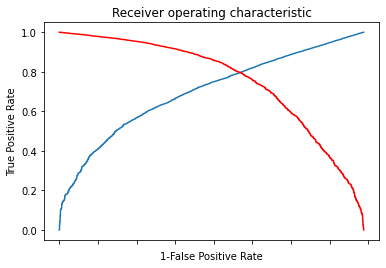

In [ ]:
tpr = tpr_test
fpr = fpr_test

thresholds = thresholds_test
get_optimal_cutoff(tpr, fpr, thresholds)

In [ ]:
threshold = 0.5

y_pred_train = np.where(yhat_train > threshold, 1, 0)
y_pred_test = np.where(yhat_test> threshold, 1, 0)

print(classification_report(y_test, 
                            y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7642
           1       0.78      0.56      0.65      2133

    accuracy                           0.87      9775
   macro avg       0.83      0.76      0.79      9775
weighted avg       0.86      0.87      0.86      9775



In [ ]:
threshold = 0.313929

y_pred_train = np.where(yhat_train > threshold, 1, 0)
y_pred_test = np.where(yhat_test> threshold, 1, 0)

print(classification_report(y_test, 
                            y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      7642
           1       0.64      0.71      0.68      2133

    accuracy                           0.85      9775
   macro avg       0.78      0.80      0.79      9775
weighted avg       0.86      0.85      0.85      9775



In [ ]:
X_train.loc[:, 'loan_status'] = y_train
X_train.loc[:, 'score_proba'] = yhat_train
X_test.loc[:, 'loan_status'] = y_test
X_test.loc[:, 'score_proba'] = yhat_test

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
X_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,score_proba
6179,24,25200,RENT,6.0,MEDICAL,A,6000,7.49,0.24,N,2,0,0.353615
26548,30,105000,MORTGAGE,5.0,EDUCATION,B,20000,11.83,0.19,N,5,0,0.025094
108,24,41000,RENT,2.0,HOMEIMPROVEMENT,D,25000,NaN,0.61,N,3,1,0.995014
9230,22,22800,RENT,4.0,EDUCATION,C,5000,13.85,0.22,Y,2,0,0.354700
5638,23,90000,RENT,7.0,MEDICAL,C,5000,15.96,0.06,Y,3,0,0.142213


## Save Your Model

In [ ]:
import pickle 


MODELNAME = 'M-LR-1.0.0.pkl'
PREPROCESSNAME = 'FE-SC-IMP-OHE-1.0.0.pkl'

final_model = clf.best_estimator_.named_steps['model']
final_pipe = clf.best_estimator_.named_steps['preprocess']

with open(MODELNAME, 'wb') as f: # save model
    pickle.dump(final_model, f)
    
with open(PREPROCESSNAME, 'wb') as f: # save pipeline
    pickle.dump(final_pipe, f)

In [ ]:
X_train.to_csv('train.csv')
X_test.to_csv('test.csv')

In [ ]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__max_iter,param_model__random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.128849,0.007977,0.022389,0.002635,0.0001,1000,40,"{'model__C': 0.0001, 'model__max_iter': 1000, ...",0.839188,0.817682,0.838768,0.825177,0.831239,0.830411,0.008210,12
1,0.138047,0.007880,0.022809,0.003044,0.001,1000,40,"{'model__C': 0.001, 'model__max_iter': 1000, '...",0.857740,0.838539,0.859862,0.845278,0.852284,0.850741,0.007916,11
2,0.197888,0.007470,0.022388,0.002497,0.01,1000,40,"{'model__C': 0.01, 'model__max_iter': 1000, 'm...",0.869060,0.851028,0.873363,0.859838,0.863196,0.863297,0.007708,10
3,0.291149,0.011845,0.020911,0.000370,0.1,1000,40,"{'model__C': 0.1, 'model__max_iter': 1000, 'mo...",0.871985,0.854393,0.876853,0.865554,0.866194,0.866996,0.007531,9
4,0.401451,0.026466,0.021257,0.000338,2,1000,40,"{'model__C': 2, 'model__max_iter': 1000, 'mode...",0.872648,0.855303,0.878353,0.867458,0.868079,0.868368,0.007611,7
5,0.402091,0.031620,0.021018,0.000487,1,1000,40,"{'model__C': 1, 'model__max_iter': 1000, 'mode...",0.872697,0.855331,0.878303,0.867325,0.867992,0.868330,0.007598,8
6,0.407936,0.038762,0.020793,0.000268,3,1000,40,"{'model__C': 3, 'model__max_iter': 1000, 'mode...",0.872601,0.855311,0.878400,0.867471,0.868129,0.868382,0.007614,5
7,0.420967,0.068867,0.021050,0.000317,4,1000,40,"{'model__C': 4, 'model__max_iter': 1000, 'mode...",0.872567,0.855309,0.878411,0.867470,0.868143,0.868380,0.007615,6
8,0.404152,0.022932,0.021316,0.000500,5,1000,40,"{'model__C': 5, 'model__max_iter': 1000, 'mode...",0.872578,0.855308,0.878421,0.867468,0.868142,0.868383,0.007618,4
9,0.420510,0.037890,0.021256,0.000271,10,1000,40,"{'model__C': 10, 'model__max_iter': 1000, 'mod...",0.872554,0.855306,0.878464,0.867488,0.868182,0.868399,0.007627,1


## **[Optional] feature selection**

In [ ]:
# from sklearn.feature_selection import RFE

# lr = LogisticRegression(random_state=SEED)
# rfe = RFE(lr, n_features_to_select=7)
# rfe.fit(X_train_sc, y_train)

In [ ]:
# X_train_rfe = rfe.transform(X_train_sc)
# X_test_rfe = rfe.transform(X_test_sc)

In [ ]:
# from sklearn.feature_selection import RFE

# lr = LogisticRegression(random_state=SEED)
# lr.fit(X_train_rfe, y_train)

In [ ]:
# yhat_train = lr.predict_proba(X_train_rfe)[:, 1]
# yhat_test = lr.predict_proba(X_test_rfe)[:, 1]

# print("ROC-AUC Score Train:", roc_auc_score(y_train, yhat_train))
# print("ROC-AUC Score Test:", roc_auc_score(y_test, yhat_test))

## Full implementation (preproecss + feature selection + algorithm selection)

In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [ ]:
# sc = StandardScaler()
# lr = LogisticRegression(random_state=SEED)
# rf = RandomForestClassifier(n_estimators=10, random_state=SEED)
# rfe = RFE(lr)

# pipe = Pipeline([('scaler', StandardScaler()),
#                  ('selector', rfe),
#                  ('classifier', LogisticRegression(random_state=True))])

In [ ]:
# search_space = [
#                 {'selector': [RFE(estimator=lr)],
#                  'selector__n_features_to_select': [6, 7, 8],
#                  'classifier': [LogisticRegression(solver='lbfgs', random_state=SEED)],
#                  'classifier__C': [0.001, 0.01, 0.1, 1.0, 10, 1000]},
#                 {'selector': [RFE(estimator=rf)],
#                  'selector__n_features_to_select': [6, 7, 8],
#                  'classifier': [RandomForestClassifier(random_state=SEED)],
#                  'classifier__n_estimators': [5, 10, 15, 20],
#                  'classifier__max_depth': [2, 3, 4]}
# ]

In [ ]:
# clf = GridSearchCV(pipe, search_space, cv=5, scoring='roc_auc', verbose=0, return_train_score=True)
# clf.fit(X_train[num_columns], y_train)

In [ ]:
# clf.best_params_

In [ ]:
# clf.best_score_

In [ ]:
# yhat_train = clf.predict_proba(X_train[num_columns])[:, 1]
# yhat_test = clf.predict_proba(X_test[num_columns])[:, 1]

# print("ROC-AUC Score Train:", roc_auc_score(y_train, yhat_train))
# print("ROC-AUC Score Test:", roc_auc_score(y_test, yhat_test))

In [ ]:
# log_result = pd.DataFrame(clf.cv_results_)

In [ ]:
# pd.options.display.max_rows = None
# pd.options.display.max_columns = None

In [ ]:
# # log_result.to_csv('log-model-development.csv')
# log_result